In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import det, matrix_rank, norm, eig
from scipy.linalg import eigvalsh, inv, pinv
import os

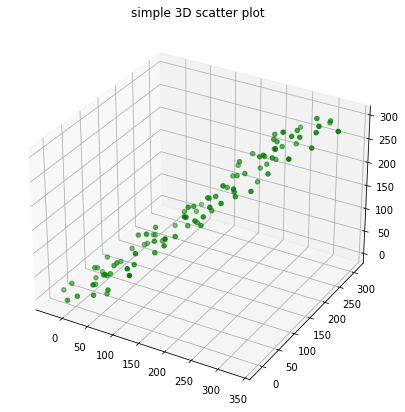

In [2]:
x1 = np.array([np.random.normal(i*3, 20, 1)  for i in range(100)])
x2 = np.array([np.random.normal(i*3, 20, 1)  for i in range(100)])
y  = np.array([[i*3] for i in range(100)])

# Creating plot
fig = plt.figure(figsize = (10, 7));
ax = plt.axes(projection ="3d");
ax.scatter3D(x1, x2, y, color = "green");
plt.title("simple 3D scatter plot");

In [3]:
X = np.hstack((x1,x2))
Y = y
A = X.T @ X

rank = matrix_rank(X)
eigenvalues = eigvalsh(A)

if rank != X.shape[1]: 
    print(f'the rank of X is {rank}. Consequently, no complete inverse exists of XX.T ')
    inverse = pinv(A)
    
else:
    print(f'the rank of X is full rank')
    inverse = inv(A)
    
w = inverse @ X.T @ Y
error = np.array([x @ w for x in X]) - Y
print(np.sum(error ** 2) / len(error))

the rank of X is full rank
226.76188039302892


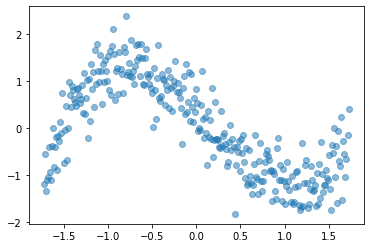

In [4]:
X = np.array([[i] for i in np.linspace(0,11,300)])
X = (X - X.mean()) / X.std()
Y = np.array([1 * (i - 5) ** 3 - 3*(i - 0.5) ** 2+ np.random.normal(i, 20, 1)  for i in np.linspace(0,11,300)]) 
Y = (Y - Y.mean()) / Y.std()

# Creating plot
fig, ax = plt.subplots()
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
plt.show();

### Ridge regression

We assume the relationship between the input $ X \rightarrow f(X)$ is described by a linear combination

$ f(X_i) = X_iw + b,
\quad X = \begin{bmatrix}
x_{00} & ... & x_{0j} \\
\vdots & \vdots & \vdots \\
x_{i0} & ... & x_{ij}
\end{bmatrix},
\quad 
w = \begin{bmatrix}
w_{1} & ... w x_{j} \\
\end{bmatrix},
\quad f(X_i) \in \mathbb{R}
$

To remove the b and solely explain the relationship as a linear transformation we include the constant in $X$ and $w$

$ f(X_i) = X_iw + b,
\quad X = \begin{bmatrix}
1 & x_{00} & ... & x_{0j} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{i0} & ... & x_{ij}
\end{bmatrix},
\quad 
w = \begin{bmatrix}
b & w_{1} & ... & w_{j} \\
\end{bmatrix},
\quad f(X_i) \in \mathbb{R}
$

However, now we implement a regularization term $\omega$ which is used to penalize high valued weights: $\Omega(f) = \lambda||w||^{2}$

We want to minimize the emperical risk: </br>
$ L = \frac{1}{i}\sum_{i} (Y - f(x))^{2} + \Omega(f) \Rightarrow \frac{1}{i}\sum_{i} (Y - Xw)^{2} + \lambda||w||^{2}\Rightarrow \frac{1}{i}||Y - Xw||^{2} + \lambda||w||^{2}$
 
 
Analytically we could solve this by taking the derivative of L and setting it to zero</br>
$\frac{\partial L}{\partial w} = \frac{2}{i}X^{T}(Y-Xw) + 2\lambda w= \frac{2}{i}(X^{T}Y-X^{T}Xw) + 2\lambda w$</br>
$\frac{\partial L}{\partial w} = 0 \quad \rightarrow w = (X^{T}X + n \lambda w)^{-1}X^{T}Y$ </br></br>
This is ALLWAYS solveable as the regularization term ensures full rank of the symmetric  matrix $(X^{T}X + n \lambda w)$

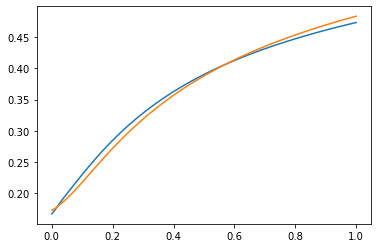

In [9]:
# Define variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

phi = lambda x : np.power(x, range(10))

biases = []
variances = []

A = phi(X_train)
N = A.shape[0]; D = A.shape[1]
I = np.eye(D)

for L in np.linspace(0,1,100):
    S = A.T @ A + I * L * N
    G = inv(S) 
    w = (G @ A.T @ y_train).flatten()

    Y_hat_train = (phi(X_train) @ w)[:, None]
    Y_hat_test = (phi(X_test) @ w)[:, None]
    
    bias = np.sum( (Y_hat_train - y_train)**2 ) / len(Y_hat_train)
    var = np.sum( (Y_hat_test - y_test)**2 ) / len(Y_hat_test)
    
    biases.append(bias)
    variances.append(var)
    
# Creating plot
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,100), biases);
ax.plot(np.linspace(0,1,100), variances);
plt.show();

NameError: name 'Y_hat' is not defined

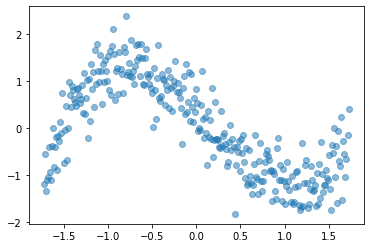

In [6]:
# Creating plot
fig, ax = plt.subplots()
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
ax.plot(X, Y_hat);
plt.show();